# Wine dataset classification

In [1]:
import configparser
import numpy as np
import pandas as pd
import logging
import coloredlogs

import aux_functions as aux
from decisiontree import Node


In [2]:
N_SPLITS = 10  # number of cross-validation splits (folds)

In [3]:
# read the configuration file
config = configparser.ConfigParser()
config.read("config.ini")

# configure logger
logger = logging.getLogger(__name__)
coloredlogs.install(level='WARNING', logger=logger.parent)

In [4]:
%matplotlib inline

## Load the dataset
a) load data headers

In [5]:
data_headers_fname = config['Data']['data_headers']
data_headers_fname


'./wine_data_headers.txt'

In [6]:
# strip 3 initial characters (row number + closing bracket + optional whitespace)
headers = np.loadtxt(data_headers_fname, dtype=str, delimiter='\n', converters={0: lambda attr: attr[3:]})
headers


array(['Class ID', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'], dtype='<U28')

b) load the data

In [7]:
data_fname = config['Data']['data_file']
data_fname

'./wine_data.txt'

In [8]:
df_input = pd.read_csv(data_fname, names=headers)
df_input.head()

,Class ID,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Decision tree classification
### Define exemplary decision tree


In [9]:
tree = Node(df_input, target_column=int(config['Data']['target_column']))
tree.learn(max_depth=5)

In [10]:
tree.depth

5

In [11]:
tree.print_terminal_labels()

Level 2 node, [0, 0]: class 2 ([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
Level 3 node, [0, 1, 0]: class 3 ([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
Level 4 node, [0, 1, 1, 0]: class 2 ([2])
Level 5 node, [0, 1, 1, 1, 0]: class 2 ([2])
Level 5 node, [0, 1, 1, 1, 1]: class 3 ([3, 3, 3, 3, 3, 3, 2, 3])
Level 3 node, [1, 0, 0]: class 2 ([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
Level 4 node, [1, 0, 1, 0]: class 1 ([1])
Level 4 node, [1, 0, 1, 1]: class 2 ([2, 2, 2, 2, 2, 2, 2, 2])
Level 4 node, [1, 1, 0, 0]: class 1 ([1])
Level 5 node, [1, 1, 0, 1, 0]: class 2 ([2])
Level 5 node, [1, 1, 0, 1, 1]: class 2 ([1, 2, 2, 2, 2, 1, 1, 1, 2])
Level 3 node, [1, 1, 1]: class 1 ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [12]:
tree.prune(min_points=2)

In [13]:
tree.depth

3

In [14]:
tree.print_terminal_labels()

Level 2 node, [0, 0]: class 2 ([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
Level 3 node, [0, 1, 0]: class 3 ([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
Level 3 node, [0, 1, 1]: class 3 ([3, 3, 2, 3, 3, 3, 3, 2, 2, 3])
Level 3 node, [1, 0, 0]: class 2 ([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
Level 3 node, [1, 0, 1]: class 2 ([2, 1, 2, 2, 2, 2, 2, 2, 2])
Level 3 node, [1, 1, 0]: class 2 ([1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2])
Level 3 node, [1, 1, 1]: class 1 ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


### Parameter tuning
Tune parameters: maximal tree depth and minimal number of samples required per leaf. Use 10-fold cross-validation.

0it [00:00, ?it/s]
0it [00:00, ?it/s]
1it [00:06,  6.29s/it]
2it [00:10,  5.65s/it]
3it [00:14,  5.19s/it]
4it [00:18,  4.87s/it]
5it [00:22,  4.63s/it]
6it [00:26,  4.46s/it]
7it [00:30,  4.34s/it]
8it [00:34,  4.26s/it]
9it [00:39,  4.28s/it]
10it [00:43,  4.38s/it]


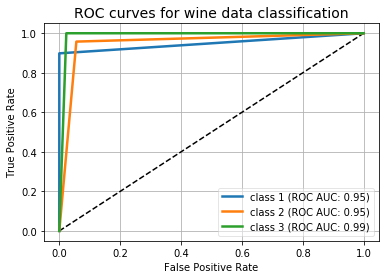

1it [00:44, 44.03s/it]
0it [00:00, ?it/s]
1it [00:04,  4.24s/it]
2it [00:08,  4.22s/it]
3it [00:12,  4.18s/it]
4it [00:16,  4.15s/it]
5it [00:20,  4.14s/it]
6it [00:24,  4.11s/it]
7it [00:29,  4.17s/it]
8it [00:33,  4.25s/it]
9it [00:38,  4.48s/it]
10it [00:42,  4.28s/it]


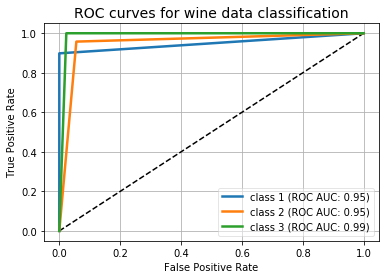

2it [01:26, 43.69s/it]
0it [00:00, ?it/s]
1it [00:04,  4.13s/it]
2it [00:08,  4.13s/it]
3it [00:12,  4.12s/it]
4it [00:16,  4.12s/it]
5it [00:20,  4.10s/it]
6it [00:24,  4.09s/it]
7it [00:28,  4.09s/it]
8it [00:32,  4.14s/it]
9it [00:37,  4.13s/it]
10it [00:41,  4.11s/it]


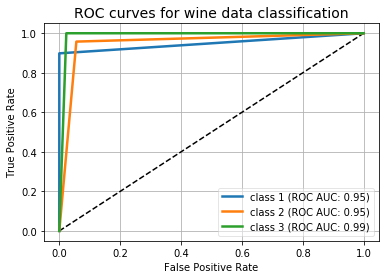

3it [02:08, 42.96s/it]
0it [00:00, ?it/s]
1it [00:04,  4.55s/it]
2it [00:09,  4.52s/it]
3it [00:14,  4.73s/it]
4it [00:18,  4.52s/it]
5it [00:22,  4.38s/it]
6it [00:26,  4.27s/it]
7it [00:30,  4.23s/it]
8it [00:34,  4.24s/it]
9it [00:39,  4.30s/it]
10it [00:43,  4.32s/it]


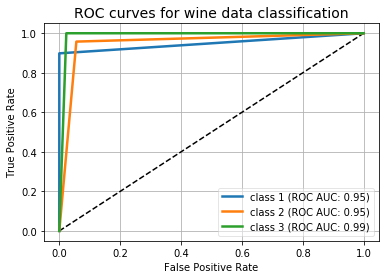

4it [02:51, 43.09s/it]
0it [00:00, ?it/s]
1it [00:04,  4.11s/it]
2it [00:08,  4.10s/it]
3it [00:12,  4.13s/it]
4it [00:17,  4.42s/it]
5it [00:21,  4.35s/it]
6it [00:26,  4.45s/it]
7it [00:30,  4.42s/it]
8it [00:36,  4.97s/it]
9it [00:43,  5.32s/it]
10it [00:47,  4.80s/it]


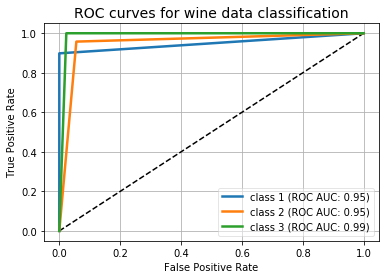

5it [03:39, 44.61s/it]
0it [00:00, ?it/s]
1it [00:04,  4.32s/it]
2it [00:08,  4.30s/it]
3it [00:12,  4.31s/it]
4it [00:17,  4.41s/it]
5it [00:23,  4.89s/it]
6it [00:30,  5.46s/it]
7it [00:35,  5.46s/it]
8it [00:41,  5.43s/it]
9it [00:47,  5.62s/it]
10it [00:52,  5.28s/it]


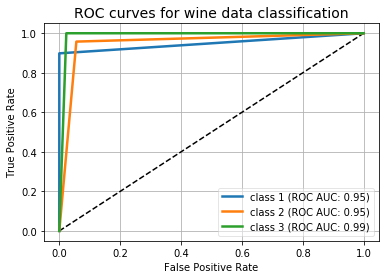

6it [04:32, 47.11s/it]
0it [00:00, ?it/s]
1it [00:07,  7.11s/it]
2it [00:13,  6.79s/it]
3it [00:18,  6.36s/it]
4it [00:24,  6.27s/it]
5it [00:29,  5.84s/it]
6it [00:35,  5.78s/it]
7it [00:40,  5.77s/it]
8it [00:44,  5.30s/it]
9it [00:49,  5.20s/it]
10it [00:54,  5.42s/it]


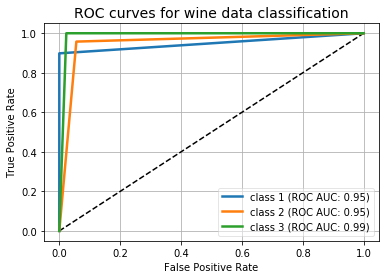

7it [05:27, 49.28s/it]
0it [00:00, ?it/s]
1it [00:04,  4.32s/it]
2it [00:08,  4.29s/it]
3it [00:12,  4.26s/it]
4it [00:17,  4.28s/it]
5it [00:21,  4.37s/it]
6it [00:26,  4.45s/it]
7it [00:30,  4.52s/it]
8it [00:36,  4.72s/it]
9it [00:40,  4.64s/it]
10it [00:44,  4.49s/it]


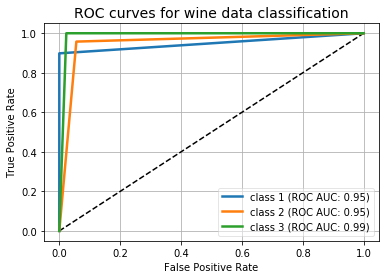

8it [06:12, 48.02s/it]
0it [00:00, ?it/s]
1it [00:05,  5.24s/it]
2it [00:11,  5.59s/it]
3it [00:17,  5.75s/it]
4it [00:21,  5.26s/it]
5it [00:26,  5.06s/it]
6it [00:30,  4.75s/it]
7it [00:35,  4.85s/it]
8it [00:41,  5.04s/it]
9it [00:49,  5.91s/it]
10it [00:55,  5.51s/it]


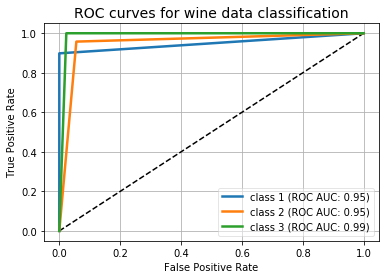

9it [07:07, 50.23s/it]
0it [00:00, ?it/s]
1it [00:06,  6.02s/it]
2it [00:11,  5.79s/it]
3it [00:16,  5.49s/it]
4it [00:21,  5.36s/it]
5it [00:26,  5.29s/it]
6it [00:31,  5.13s/it]
7it [00:36,  5.14s/it]
8it [00:41,  5.05s/it]
9it [00:46,  5.18s/it]
10it [00:54,  5.41s/it]


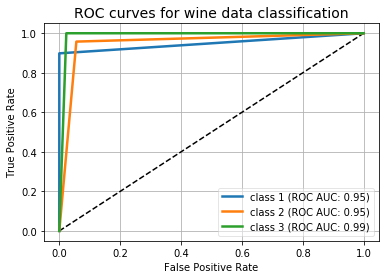

10it [08:01, 51.44s/it]
0it [00:00, ?it/s]
1it [00:05,  5.51s/it]
2it [00:10,  5.49s/it]
3it [00:17,  5.77s/it]
4it [00:22,  5.72s/it]
5it [00:27,  5.33s/it]
6it [00:34,  6.00s/it]
7it [00:40,  5.75s/it]
8it [00:44,  5.32s/it]
9it [00:49,  5.11s/it]
10it [00:54,  5.45s/it]


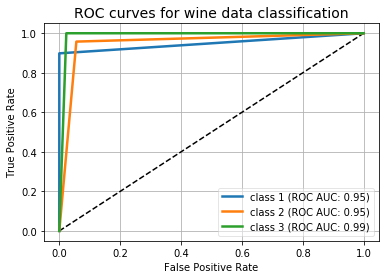

11it [08:56, 52.41s/it]
0it [00:00, ?it/s]
1it [00:04,  4.93s/it]
2it [00:09,  4.70s/it]
3it [00:14,  5.01s/it]
4it [00:19,  5.05s/it]
5it [00:25,  5.06s/it]
6it [00:30,  5.18s/it]
7it [00:35,  5.06s/it]
8it [00:39,  4.91s/it]
9it [00:44,  4.71s/it]
10it [00:49,  4.96s/it]


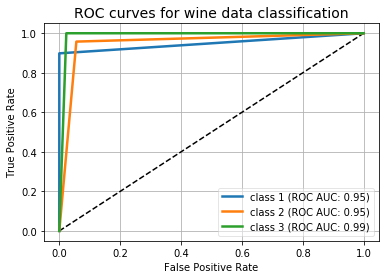

12it [09:46, 51.62s/it]
0it [00:00, ?it/s]
1it [00:05,  5.58s/it]
2it [00:10,  5.30s/it]
3it [00:15,  5.15s/it]
4it [00:19,  5.03s/it]
5it [00:26,  5.40s/it]
6it [00:30,  5.03s/it]
7it [00:34,  4.89s/it]
8it [00:39,  4.77s/it]
9it [00:43,  4.72s/it]
10it [00:48,  4.80s/it]


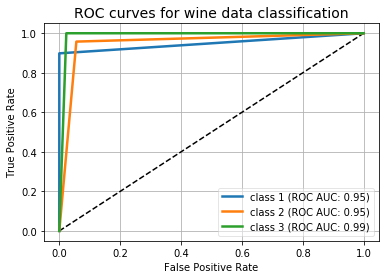

13it [10:34, 50.59s/it]
0it [00:00, ?it/s]
1it [00:04,  4.74s/it]
2it [00:09,  4.61s/it]
3it [00:13,  4.56s/it]
4it [00:17,  4.49s/it]
5it [00:22,  4.42s/it]
6it [00:26,  4.36s/it]
7it [00:31,  4.59s/it]
8it [00:36,  4.75s/it]
9it [00:41,  4.93s/it]
10it [00:46,  4.62s/it]


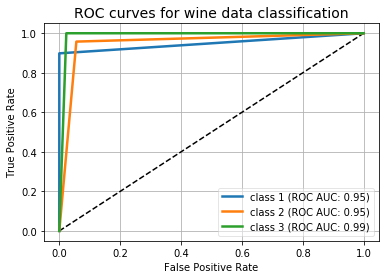

14it [11:20, 49.31s/it]
0it [00:00, ?it/s]
1it [00:04,  4.13s/it]
2it [00:08,  4.12s/it]
3it [00:12,  4.16s/it]
4it [00:17,  4.52s/it]
5it [00:24,  5.12s/it]
6it [00:29,  5.08s/it]
7it [00:36,  5.60s/it]
8it [00:42,  5.79s/it]
9it [00:47,  5.60s/it]
10it [00:52,  5.21s/it]


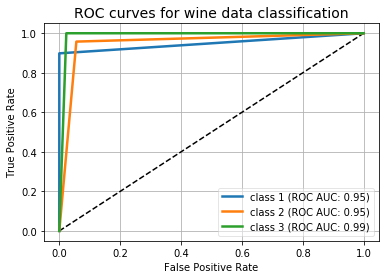

15it [12:13, 50.21s/it]
0it [00:00, ?it/s]
1it [00:04,  4.59s/it]
2it [00:09,  4.60s/it]
3it [00:14,  4.69s/it]
4it [00:21,  5.52s/it]
5it [00:26,  5.26s/it]
6it [00:32,  5.58s/it]
7it [00:37,  5.46s/it]
8it [00:42,  5.27s/it]
9it [00:46,  4.97s/it]
10it [00:51,  5.13s/it]


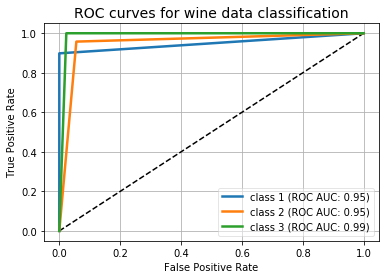

16it [13:04, 50.58s/it]
0it [00:00, ?it/s]
1it [00:04,  4.76s/it]
2it [00:09,  4.63s/it]
3it [00:14,  4.95s/it]
4it [00:20,  5.19s/it]
5it [00:25,  5.03s/it]
6it [00:29,  4.86s/it]
7it [00:33,  4.68s/it]
8it [00:38,  4.54s/it]
9it [00:42,  4.43s/it]
10it [00:46,  4.65s/it]


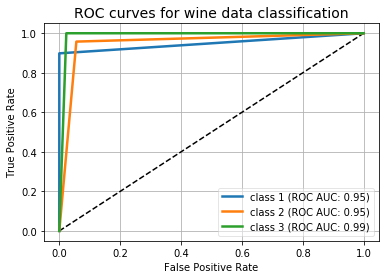

17it [13:51, 49.40s/it]
0it [00:00, ?it/s]
1it [00:04,  4.19s/it]
2it [00:08,  4.23s/it]
3it [00:12,  4.29s/it]
4it [00:18,  4.72s/it]
5it [00:23,  4.89s/it]
6it [00:28,  4.85s/it]
7it [00:33,  4.73s/it]
8it [00:37,  4.68s/it]
9it [00:42,  4.70s/it]
10it [00:47,  4.71s/it]


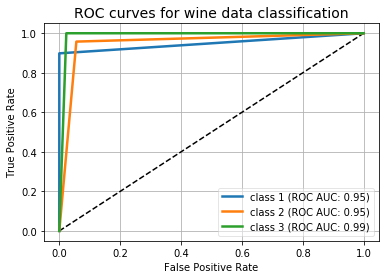

18it [14:38, 48.78s/it]
0it [00:00, ?it/s]
1it [00:05,  5.17s/it]
2it [00:09,  4.96s/it]
3it [00:14,  4.78s/it]
4it [00:18,  4.64s/it]
5it [00:22,  4.57s/it]
6it [00:26,  4.48s/it]
7it [00:31,  4.44s/it]
8it [00:35,  4.39s/it]
9it [00:39,  4.35s/it]
10it [00:44,  4.40s/it]


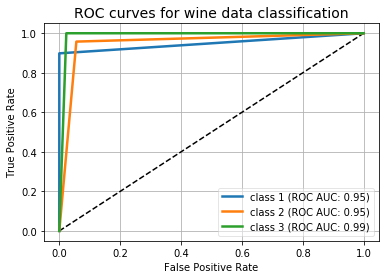

19it [15:22, 47.41s/it]
0it [00:00, ?it/s]
1it [00:04,  4.17s/it]
2it [00:08,  4.35s/it]
3it [00:13,  4.36s/it]
4it [00:17,  4.28s/it]
5it [00:21,  4.23s/it]
6it [00:25,  4.21s/it]
7it [00:29,  4.21s/it]
8it [00:34,  4.21s/it]
9it [00:38,  4.23s/it]
10it [00:42,  4.27s/it]


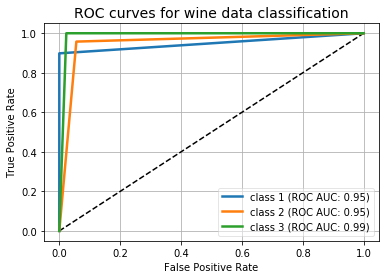

20it [16:05, 46.03s/it]
0it [00:00, ?it/s]
1it [00:04,  4.76s/it]
2it [00:08,  4.59s/it]
3it [00:13,  4.54s/it]
4it [00:17,  4.46s/it]
5it [00:21,  4.37s/it]
6it [00:25,  4.29s/it]
7it [00:30,  4.30s/it]
8it [00:34,  4.27s/it]
9it [00:38,  4.25s/it]
10it [00:42,  4.28s/it]


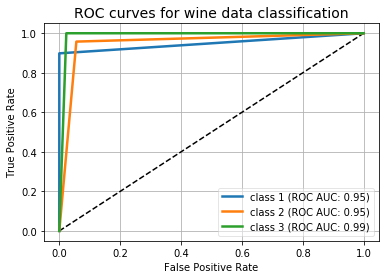

21it [16:48, 45.11s/it]
0it [00:00, ?it/s]
1it [00:04,  4.51s/it]
2it [00:08,  4.45s/it]
3it [00:13,  4.45s/it]
4it [00:17,  4.33s/it]
5it [00:21,  4.25s/it]
6it [00:25,  4.22s/it]
7it [00:29,  4.17s/it]
8it [00:33,  4.12s/it]
9it [00:37,  4.12s/it]
10it [00:42,  4.20s/it]


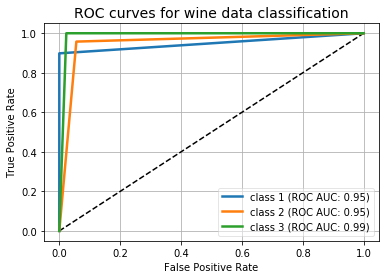

22it [17:30, 44.24s/it]
0it [00:00, ?it/s]
1it [00:04,  4.36s/it]
2it [00:08,  4.28s/it]
3it [00:12,  4.23s/it]
4it [00:16,  4.17s/it]
5it [00:21,  4.24s/it]
6it [00:25,  4.18s/it]
7it [00:29,  4.14s/it]
8it [00:33,  4.10s/it]
9it [00:37,  4.10s/it]
10it [00:41,  4.14s/it]


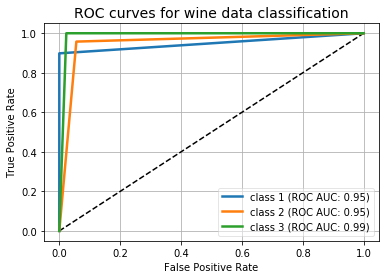

23it [18:12, 43.44s/it]
0it [00:00, ?it/s]
1it [00:04,  4.18s/it]
2it [00:08,  4.15s/it]
3it [00:12,  4.28s/it]
4it [00:17,  4.31s/it]
5it [00:21,  4.35s/it]
6it [00:26,  4.39s/it]
7it [00:30,  4.35s/it]
8it [00:34,  4.35s/it]
9it [00:38,  4.27s/it]
10it [00:43,  4.31s/it]


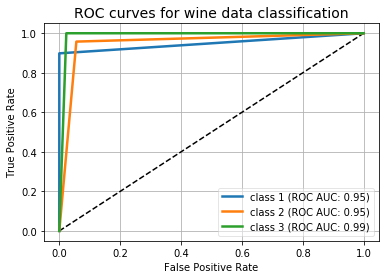

24it [18:55, 43.38s/it]
0it [00:00, ?it/s]
1it [00:04,  4.76s/it]
2it [00:09,  4.90s/it]
3it [00:14,  4.74s/it]
4it [00:19,  4.77s/it]
5it [00:24,  4.80s/it]
6it [00:28,  4.63s/it]
7it [00:32,  4.52s/it]
8it [00:36,  4.41s/it]
9it [00:40,  4.35s/it]
10it [00:45,  4.51s/it]


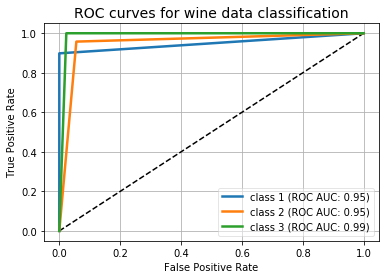

25it [19:40, 43.96s/it]
0it [00:00, ?it/s]
1it [00:05,  5.20s/it]
2it [00:09,  4.93s/it]
3it [00:13,  4.75s/it]
4it [00:18,  4.60s/it]
5it [00:22,  4.45s/it]
6it [00:26,  4.33s/it]
7it [00:31,  4.58s/it]
8it [00:35,  4.51s/it]
9it [00:40,  4.49s/it]
10it [00:44,  4.48s/it]


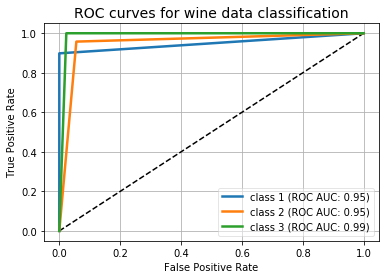

26it [20:25, 44.27s/it]
0it [00:00, ?it/s]
1it [00:04,  4.60s/it]
2it [00:11,  5.32s/it]
3it [00:16,  5.19s/it]
4it [00:20,  4.89s/it]
5it [00:25,  4.78s/it]
6it [00:29,  4.67s/it]
7it [00:34,  4.65s/it]
8it [00:38,  4.58s/it]
9it [00:42,  4.43s/it]
10it [00:46,  4.69s/it]


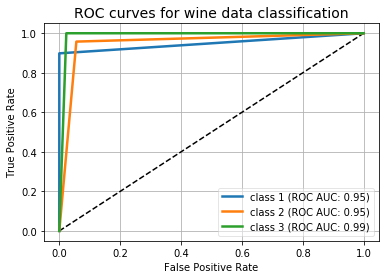

27it [21:12, 45.10s/it]
0it [00:00, ?it/s]
1it [00:06,  6.61s/it]
2it [00:11,  6.05s/it]
3it [00:16,  5.91s/it]
4it [00:21,  5.61s/it]
5it [00:26,  5.33s/it]
6it [00:30,  4.97s/it]
7it [00:34,  4.71s/it]
8it [00:40,  5.03s/it]
9it [00:45,  4.93s/it]
10it [00:49,  4.94s/it]


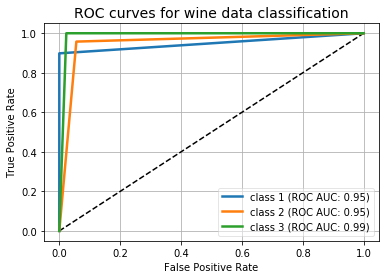

28it [22:02, 47.23s/it]


In [15]:
tree_params = dict(max_depth=range(3, 10), min_points=range(1, 5))
all_results, best_result = aux.tune_params(aux.cross_validate_tree, tree_params, func_args=(N_SPLITS, df_input),
                                           scoring_metrics='f1_score')

In [16]:
all_results

[{'max_depth': 3, 'min_points': 1, 'cm': array([[53,  6,  0],
         [ 0, 68,  3],
         [ 0,  0, 48]], dtype=int64), 'accuracy': 0.949438202247191, 'f1_score': 0.949438202247191},
 {'max_depth': 3, 'min_points': 2, 'cm': array([[53,  6,  0],
         [ 0, 68,  3],
         [ 0,  0, 48]], dtype=int64), 'accuracy': 0.949438202247191, 'f1_score': 0.949438202247191},
 {'max_depth': 3, 'min_points': 3, 'cm': array([[53,  6,  0],
         [ 0, 68,  3],
         [ 0,  0, 48]], dtype=int64), 'accuracy': 0.949438202247191, 'f1_score': 0.949438202247191},
 {'max_depth': 3, 'min_points': 4, 'cm': array([[53,  6,  0],
         [ 0, 68,  3],
         [ 0,  0, 48]], dtype=int64), 'accuracy': 0.949438202247191, 'f1_score': 0.949438202247191},
 {'max_depth': 4, 'min_points': 1, 'cm': array([[53,  6,  0],
         [ 0, 68,  3],
         [ 0,  0, 48]], dtype=int64), 'accuracy': 0.949438202247191, 'f1_score': 0.949438202247191},
 {'max_depth': 4, 'min_points': 2, 'cm': array([[53,  6,  0],
        

In [17]:
best_result

{'max_depth': 3, 'min_points': 1, 'cm': array([[53,  6,  0],
        [ 0, 68,  3],
        [ 0,  0, 48]], dtype=int64), 'accuracy': 0.949438202247191, 'f1_score': 0.949438202247191}

## Other classification models

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


Split the dataset into X (input attributes) and y (labels)

In [19]:
df_y = tree.class_labels
df_x = tree.data[tree.input_attributes]
df_x.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Define generic grid search

In [20]:
gs = aux.make_grid_searcher(df_x, df_y, N_SPLITS)

### Random Forest Classifier

c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
10it [00:01,  7.75it/s]


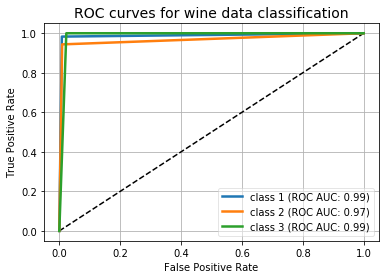

In [21]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_params = dict(max_depth=range(3,10), min_samples_leaf=range(1,5))
rf_best_params, rf_stats = gs(rf, rf_params)


In [22]:
rf_best_params

{'max_depth': 5, 'min_samples_leaf': 1}

In [23]:
rf_stats

{'cm': array([[58,  1,  0],
        [ 1, 67,  3],
        [ 0,  0, 48]], dtype=int64),
 'accuracy': 0.9719101123595506,
 'f1_score': 0.9719101123595506}

## Shallow Neural Network
With single hidden layer

c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarnin

c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarnin

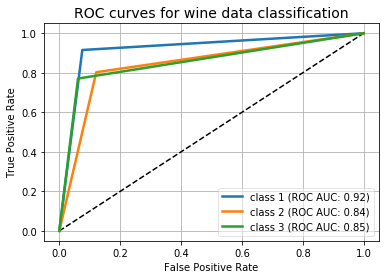

({'alpha': 0.001, 'hidden_layer_sizes': (500,)}, {'cm': array([[54,  5,  0],
         [ 6, 57,  8],
         [ 3,  8, 37]], dtype=int64),
  'accuracy': 0.8314606741573034,
  'f1_score': 0.8314606741573034})

In [24]:
snn = MLPClassifier()
snn_params = dict(hidden_layer_sizes=[(100,), (200,), (500,)], alpha=[0.001, 0.0001, 0.00001])
gs(snn, snn_params)

### Deep Neural Network

c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\grund\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The defaul

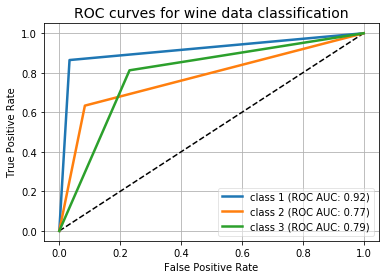

({'alpha': 0.001,
  'hidden_layer_sizes': (50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50,
   50)},
 {'cm': array([[51,  0,  8],
         [ 4, 45, 22],
         [ 0,  9, 39]], dtype=int64),
  'accuracy': 0.7584269662921348,
  'f1_score': 0.7584269662921348})

In [25]:
dnn = MLPClassifier()
dnn_params = dict(hidden_layer_sizes=[100*(10,), 50*(20,), 20*(50,)], alpha=[0.001, 0.0001, 0.00001])
gs(dnn, dnn_params)
